# NLP Task:
- Customer reviews 
- Are they good or bad? Let's Find out!
## About Data
- Given a dataset which contain reviews of many people collected from various site using webscrapping.
- Make prediction whether reviews are positive and negative.
- Positive: 1
- Negative: 0

In [1]:
import pandas as pd
import numpy as np
import os
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
base_path = os.path.abspath('')
print(base_path)

C:\Users\Arush\Desktop\NLP\Ex-machina 2


In [3]:
train = pd.read_csv('nlp_train.csv')
test = pd.read_csv('nlp_test.csv')
print("Train data\n", train.head())
print("Test data\n",test.head())

Train data
    index                                            reviews  label
0      0  mature intelligent and highly charged melodram...      1
1      1  http://video.google.com/videoplay?docid=211772...      1
2      2  Title: Opera (1987) Director: Dario Argento Ca...      1
3      3  I think a lot of people just wrote this off as...      1
4      4  This is a story of two dogs and a cat looking ...      1
Test data
    index                                            reviews
0      0  Wow. I have seen some really bad movies in my ...
1      1  Naruto the Anime TV Series has so far spawned ...
2      2  When Gundam0079 became the movie trilogy most ...
3      3  only if its the last thing yo do and your humo...
4      4  The director states in the Behind-the-Scenes f...


In [4]:
print("Train data\n", train.shape)
print("Test data\n",test.shape)
print(train.columns)
lens = train['reviews'].str.len()
lens_test = test['reviews'].str.len()

Train data
 (30000, 3)
Test data
 (10000, 2)
Index(['index', 'reviews', 'label'], dtype='object')


Train data
mean =  1305.0191
Std =  980.7906640797931
Max =  12988
Min =  32


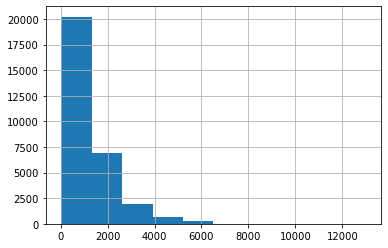

In [5]:
print('Train data')
print('mean = ',lens.mean())
print('Std = ',lens.std())
print('Max = ',lens.max())
print('Min = ',lens.min())
lens.hist()

Test data
mean =  1307.1005
Std =  995.5609652669726
Max =  13704
Min =  70


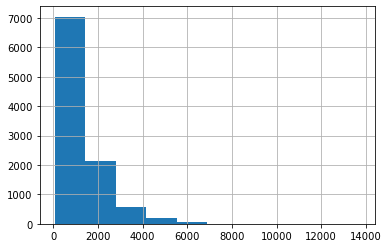

In [6]:
print('Test data')
print('mean = ',lens_test.mean())
print('Std = ',lens_test.std())
print('Max = ',lens_test.max())
print('Min = ',lens_test.min())
lens_test.hist()

In [7]:
train.describe()

,index,label
count,30000.000000,30000.000000
mean,14999.500000,0.499367
std,8660.398374,0.500008
min,0.000000,0.000000
25%,7499.750000,0.000000
50%,14999.500000,0.000000
75%,22499.250000,1.000000
max,29999.000000,1.000000


In [8]:
test.describe()

,index
count,10000.00000
mean,4999.50000
std,2886.89568
min,0.00000
25%,2499.75000
50%,4999.50000
75%,7499.25000
max,9999.00000


In [9]:
from tqdm import tqdm
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [5]:
import time
dust = time.time()
embeddings_index = {}
f = open('glove.840B.300d.txt', encoding="utf8")
# f = open('glove.840B.300d.txt')
i=0
for line in tqdm(f):
    if(i%200000==0):
        print("Copleted : ",i)
    try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except:
        print(i)
    i=i+1
f.close()

print('Found %s word vectors.' % len(embeddings_index))
star = time.time()
print("It took ",star-dust,"s")

287it [00:00, 2760.44it/s]

Copleted :  0


53200it [00:09, 6408.08it/s]

52343


129242it [00:23, 5280.68it/s]

128261


151681it [00:27, 5596.13it/s]

151102


200743it [00:36, 5533.33it/s]

Copleted :  200000
200668


210549it [00:37, 6326.66it/s]

209833


221761it [00:39, 6017.33it/s]

220779


254072it [00:48, 5157.13it/s]

253461


366455it [01:09, 4523.91it/s]

365745


400474it [01:17, 2982.89it/s]

Copleted :  400000


532853it [01:45, 4879.16it/s]

532048


600205it [01:59, 2077.68it/s]

Copleted :  600000


717791it [02:26, 4440.53it/s]

717302


801176it [02:43, 5254.05it/s]

Copleted :  800000


995690it [03:19, 4280.39it/s]

994818


1000796it [03:20, 6381.55it/s]

Copleted :  1000000


1123879it [03:42, 5463.94it/s]

1123331


1148940it [03:47, 4759.55it/s]

1148409


1200645it [03:57, 5341.90it/s]

Copleted :  1200000


1352747it [04:33, 5698.00it/s]

1352110


1400491it [04:43, 4786.06it/s]

Copleted :  1400000


1500391it [05:01, 5777.85it/s]

1499727


1534475it [05:08, 5696.00it/s]

1533809


1600689it [05:25, 4107.56it/s]

Copleted :  1600000


1800026it [06:09, 4157.73it/s]

Copleted :  1800000


1900462it [06:31, 4457.42it/s]

1899841


1921823it [06:35, 4413.51it/s]

1921152


2000455it [06:50, 4664.51it/s]

Copleted :  2000000


2059652it [07:05, 4603.66it/s]

2058966


2165807it [07:25, 4708.13it/s]

2165246


2196017it [07:31, 4860.51it/s]

Found 2195884 word vectors.
It took  452.13382625579834 s


In [11]:
corpus=[]
#Length of data to be considered for the testing
l = int(train.shape[0])

- This might take some time depending on your compute power.
- For me , it took around 40 minutes to preprocess
- It takes around 75 seconds to preprocess 1000 rows.
- I have already saved the cleaned data in a csv file so you can use that file if you don't want to waste time("nlp_train_data_set_cleaned.csv").

In [12]:
#Preprocessing the data
import time 
dust = time.time()
for i in range(0,l):
    review = re.sub('[^a-zA-Z]',' ',train['reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
    star = time.time()
    if (i%1000==0):
        print(i,'Completed!',star-dust,'s Passed.')

0 Completed! 0.032998085021972656 s Passed.
1000 Completed! 90.8501365184784 s Passed.
2000 Completed! 180.05336332321167 s Passed.
3000 Completed! 273.1448702812195 s Passed.
4000 Completed! 361.451256275177 s Passed.
5000 Completed! 445.9605631828308 s Passed.
6000 Completed! 523.5647814273834 s Passed.
7000 Completed! 600.8331599235535 s Passed.
8000 Completed! 683.6045956611633 s Passed.
9000 Completed! 766.6439061164856 s Passed.
10000 Completed! 845.7228300571442 s Passed.
11000 Completed! 925.9248015880585 s Passed.
12000 Completed! 1004.6880211830139 s Passed.
13000 Completed! 1089.0178399085999 s Passed.
14000 Completed! 1174.3427498340607 s Passed.
15000 Completed! 1255.035056591034 s Passed.
16000 Completed! 1342.4965779781342 s Passed.
17000 Completed! 1419.9301550388336 s Passed.
18000 Completed! 1504.42054104805 s Passed.
19000 Completed! 1585.7105195522308 s Passed.
20000 Completed! 1695.0225656032562 s Passed.
21000 Completed! 1808.4533133506775 s Passed.
22000 Complete

In [13]:
corpus_test=[]
#Length of data to be considered for the testing
l_test = int(test.shape[0])
#Preprocessing the data
import time 
dust = time.time()
for i in range(0,l_test):
    review = re.sub('[^a-zA-Z]',' ',test['reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_test.append(review)
    star = time.time()
    if (i%1000==0):
        print(i,'Completed!',star-dust,'s Passed.')

0 Completed! 0.23394989967346191 s Passed.
1000 Completed! 149.80958247184753 s Passed.
2000 Completed! 282.16928601264954 s Passed.
3000 Completed! 422.429563999176 s Passed.
4000 Completed! 568.2378561496735 s Passed.
5000 Completed! 714.5858521461487 s Passed.
6000 Completed! 845.2058227062225 s Passed.
7000 Completed! 971.5178306102753 s Passed.
8000 Completed! 1083.013822555542 s Passed.
9000 Completed! 1179.8258202075958 s Passed.


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 5000)
X = cv.fit_transform(corpus).toarray()
y = train.iloc[:l, 2].values

In [9]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
#     words = str(s).lower().decode('utf-8')
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
#     print('Shape of M = ',M.shape)
    v = M.sum(axis=0)
#     print('Shape of v = ',v.shape)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [14]:
X_train = np.array(corpus)
y_train = train.iloc[:,2].values
xtest = np.array(corpus_test)
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(X_train, y_train, 
                                                  stratify=y_train, 
                                                  random_state=42, 
                                                  test_size=0.08, shuffle=True)
print (xtrain.shape)
print (xvalid.shape)
print(xtest.shape)

(27600,)
(2400,)
(10000,)


In [11]:
import nltk
nltk.download('punkt')
# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(xtrain)]
xvalid_glove = [sent2vec(x) for x in tqdm(xvalid)]
xtest_glove = [sent2vec(x) for x in tqdm(xtest)]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:28<00:00, 113.41it/s]


In [16]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        try:
            actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        except:
            actual2 = np.zeros((actual.shape[0], predicted.shape[0]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [13]:
xtrain_glove = np.array(xtrain_glove)
xvalid_glove = np.array(xvalid_glove)
xtest_glove = np.array(xtest_glove)
print("shape of xtrain_glove",xtrain_glove.shape)
print("shape of xvalid_glove",xvalid_glove.shape)
print("shape of xvalid_glove",xtest_glove.shape)

shape of xtrain_glove (27600, 300)
shape of xvalid_glove (2400, 300)
shape of xvalid_glove (10000, 300)


# DeepLearning

In [14]:
from keras.utils import np_utils
from sklearn import preprocessing

Using TensorFlow backend.


In [16]:
# scale the data before any neural net:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xvalid_glove_scl = scl.transform(xvalid_glove)
xtest_glove_scl = scl.transform(xtest_glove)

In [17]:
# we need to binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical(ytrain)
yvalid_enc = np_utils.to_categorical(yvalid)

In [18]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization

In [19]:
# create a simple 3 layer sequential neural net
model = Sequential()

model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(2))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()
model_simple = model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [20]:
history_simple = model.fit(xtrain_glove_scl, y=ytrain_enc, batch_size=64, 
          epochs=10, verbose=1, 
          validation_data=(xvalid_glove_scl, yvalid_enc))

Train on 27600 samples, validate on 2400 samples
Epoch 1/10
27600/27600 [==============================] - 56s 2ms/step - loss: 0.4906 - val_loss: 0.3822
Epoch 2/10
27600/27600 [==============================] - 5s 197us/step - loss: 0.3905 - val_loss: 0.3725
Epoch 3/10
27600/27600 [==============================] - 5s 193us/step - loss: 0.3698 - val_loss: 0.3818
Epoch 4/10
27600/27600 [==============================] - 5s 183us/step - loss: 0.3558 - val_loss: 0.3664
Epoch 5/10
27600/27600 [==============================] - 5s 180us/step - loss: 0.3422 - val_loss: 0.3715
Epoch 6/10
27600/27600 [==============================] - 5s 193us/step - loss: 0.3270 - val_loss: 0.3849
Epoch 7/10
27600/27600 [==============================] - 5s 187us/step - loss: 0.3162 - val_loss: 0.3735
Epoch 8/10
27600/27600 [==============================] - 5s 187us/step - loss: 0.3013 - val_loss: 0.3765
Epoch 9/10
27600/27600 [==============================] - 5s 183us/step - loss: 0.2863 - val_loss: 0.369

dict_keys(['val_loss', 'loss'])


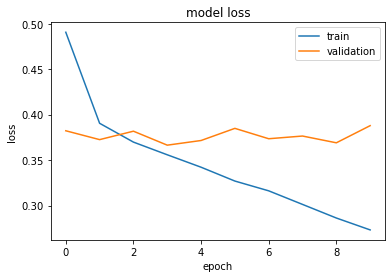

In [21]:
print(history_simple.history.keys())
h = history_simple
import matplotlib.pyplot as plt
# "Loss"
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [26]:
model_simple = model
y_pred = model.predict(xtest_glove_scl)
y_pred = np.array(y_pred)
y_pred = np.argmax(y_pred,axis = 1)
ans = []
for i in range(len(y_pred)):
    ans.append([i,y_pred[i]])
p = pd.DataFrame(ans,columns=['index','label'])
p.to_csv('simple_submit2.csv',index=False)
p.head()

,index,label
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [27]:
!kaggle competitions submit -c ex-machina-question-2 -f simple_submit2.csv -m "Simple DNN on cleaned corpus"

Successfully submitted to EX-MACHINA Final Online Round Question-2



  0%|          | 0.00/77.1k [00:00<?, ?B/s]
 10%|#         | 8.00k/77.1k [00:00<00:02, 28.2kB/s]
100%|##########| 77.1k/77.1k [00:08<00:00, 9.14kB/s]


# Lstm

In [28]:
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

In [29]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 200

token.fit_on_texts(list(xtrain))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)
xtest_seq = token.texts_to_sequences(xtest)

# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)

word_index = token.word_index

In [30]:
print(len(xtrain[0]),xtrain_seq[0][0:20])
print(len(xtrain[0]),xtrain[0].split()[:20])
print(word_index['made'])

528 [260, 1464, 35, 167, 195, 5859, 586, 1372, 285, 662, 1946, 48, 519, 5125, 1898, 68, 409, 1597, 19, 15]
528 ['surpris', 'comparison', 'made', 'yet', 'mind', 'mencia', 'televis', 'program', 'aw', 'truth', 'ran', 'year', 'ago', 'helm', 'controversi', 'director', 'michael', 'moor', 'show', 'would']
35


In [31]:
print(len(xtrain_seq[0]),len(xvalid_seq[0]))
print(len(xtrain_pad[0]),len(xvalid_pad[0]))
print(type(word_index),len(word_index))

83 92
200 200
<class 'dict'> 53156


In [32]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|█████████████████████████████████████████████████████████████████████████| 53156/53156 [00:03<00:00, 13557.73it/s]


# Simple LSTM Neural network with some Dense Layers

In [42]:
# A simple LSTM with glove embeddings and some dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
history_lstm = model.fit(xtrain_pad, y=ytrain_enc, 
                         batch_size=512, epochs=100, verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Train on 27600 samples, validate on 2400 samples
Epoch 1/100
27600/27600 [==============================] - 50s 2ms/step - loss: 0.6071 - val_loss: 0.4511
Epoch 2/100
27600/27600 [==============================] - 39s 1ms/step - loss: 0.5294 - val_loss: 0.4182
Epoch 3/100
27600/27600 [==============================] - 31s 1ms/step - loss: 0.5072 - val_loss: 0.4276
Epoch 4/100
27600/27600 [==============================] - 31s 1ms/step - loss: 0.4869 - val_loss: 0.3906
Epoch 5/100
27600/27600 [==============================] - 30s 1ms/step - loss: 0.4718 - val_loss: 0.3736
Epoch 6/100
27600/27600 [==============================] - 30s 1ms/step - loss: 0.4581 - val_loss: 0.3754
Epoch 7/100
27600/27600 [==============================] - 30s 1ms/step - loss: 0.4373 - val_loss: 0.3400
Epoch 8/100
27600/27600 [==============================] - 30s 1ms/step - loss: 0.4219 - val_loss: 0.3469
Epoch 9/100
27600/27600 [==============================] - 30s 1ms/step - loss: 0.4085 - val_loss: 0.33

KeyboardInterrupt: 

- I stopped the training so that I can add Early Stopping to save time and prevent over fitting.

In [ ]:
print(history_lstm.history.keys())
h = history_lstm
import matplotlib.pyplot as plt
# "Loss"
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# LSTM with Early Stopping

In [35]:
# A simple LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history_lstm_es = model.fit(xtrain_pad, y=ytrain_enc, batch_size=128, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

Train on 27600 samples, validate on 2400 samples
Epoch 1/100
27600/27600 [==============================] - 100s 4ms/step - loss: 0.5737 - val_loss: 0.4485
Epoch 2/100
27600/27600 [==============================] - 99s 4ms/step - loss: 0.5104 - val_loss: 0.4101
Epoch 3/100
27600/27600 [==============================] - 105s 4ms/step - loss: 0.4657 - val_loss: 0.3655
Epoch 4/100
27600/27600 [==============================] - 96s 3ms/step - loss: 0.4262 - val_loss: 0.3406
Epoch 5/100
27600/27600 [==============================] - 101s 4ms/step - loss: 0.3944 - val_loss: 0.3267
Epoch 6/100
27600/27600 [==============================] - 107s 4ms/step - loss: 0.3709 - val_loss: 0.3261
Epoch 7/100
27600/27600 [==============================] - 107s 4ms/step - loss: 0.3505 - val_loss: 0.3222
Epoch 8/100
27600/27600 [==============================] - 111s 4ms/step - loss: 0.3356 - val_loss: 0.3003
Epoch 9/100
27600/27600 [==============================] - 109s 4ms/step - loss: 0.3236 - val_los

dict_keys(['val_loss', 'loss'])


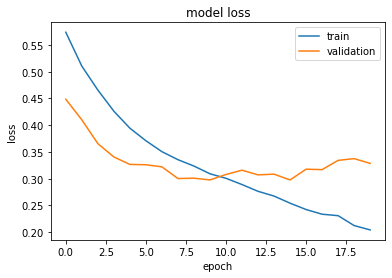

In [36]:
model_lstm = model
print(history_lstm_es.history.keys())
h = history_lstm_es
import matplotlib.pyplot as plt
# "Loss"
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [38]:
y_pred = model.predict(xtest_pad)
y_pred = np.array(y_pred)
y_pred = np.argmax(y_pred,axis = 1)
ans = []
for i in range(len(y_pred)):
    ans.append([i,y_pred[i]])
p = pd.DataFrame(ans,columns=['index','label'])
p.to_csv('lstm_submit.csv',index=False)
p.head()

,index,label
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


In [39]:
!kaggle competitions submit -c ex-machina-question-2 -f lstm_submit.csv -m "Simple LSTM on embeddings using maxlen = 200"

Successfully submitted to EX-MACHINA Final Online Round Question-2



  0%|          | 0.00/77.1k [00:00<?, ?B/s]
 10%|#         | 8.00k/77.1k [00:00<00:02, 25.4kB/s]
100%|##########| 77.1k/77.1k [00:06<00:00, 13.1kB/s]


# Bi-Directional LSTM

In [40]:
# A simple bidirectional LSTM with glove embeddings and three dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(300, dropout=0.3, recurrent_dropout=0.3)))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()
# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history_bi_lstm = model.fit(xtrain_pad, y=ytrain_enc, batch_size=128, epochs=20, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])
model_bi_lstm = model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 300)          15947100  
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 600)               1442400   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               307712    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)              

dict_keys(['val_loss', 'loss'])


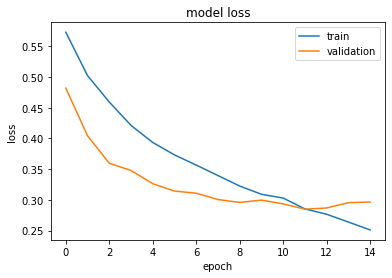

In [42]:
print(history_bi_lstm.history.keys())
h = history_bi_lstm
import matplotlib.pyplot as plt
# "Loss"
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

- As you can clearly see , we got a somewhat better results using Bi-Directional LSTM Layer compared to LSTM.
- Training time increased by a factor of 1.5 time per epoch.

In [43]:
y_pred = model.predict(xtest_pad)
y_pred = np.array(y_pred)
y_pred = np.argmax(y_pred,axis = 1)
ans = []
for i in range(len(y_pred)):
    ans.append([i,y_pred[i]])
p = pd.DataFrame(ans,columns=['index','label'])
p.to_csv('bi_lstm_submit.csv',index=False)
p.head()

,index,label
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


In [44]:
!kaggle competitions submit -c ex-machina-question-2 -f bi_lstm_submit.csv -m "Simple Bi-LSTM on embeddings using maxlen = 200"

Successfully submitted to EX-MACHINA Final Online Round Question-2



  0%|          | 0.00/77.1k [00:00<?, ?B/s]
 10%|#         | 8.00k/77.1k [00:00<00:02, 29.1kB/s]
100%|##########| 77.1k/77.1k [00:11<00:00, 7.05kB/s]


# Tf-idf

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Always start with these features. They work (almost) everytime!
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)
xtest_tfv = tfv.transform(xtest)

In [17]:
from sklearn.linear_model import LogisticRegression
# Fitting a simple Logistic Regression on TFIDF
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict_proba(xvalid_tfv)
print ("logloss: %0.3f " % multiclass_logloss(yvalid, predictions))

logloss: 0.331 


In [18]:
y_pred =  clf.predict_proba(xtest_tfv)
print(y_pred[:5])
y_pred = np.array(y_pred)

[[0.98207591 0.01792409]
 [0.16826339 0.83173661]
 [0.2883991  0.7116009 ]
 [0.73511363 0.26488637]
 [0.6466277  0.3533723 ]]


In [19]:
y_pred = np.argmax(y_pred,axis = 1)
ans = []
for i in range(len(y_pred)):
    ans.append([i,y_pred[i]])
p = pd.DataFrame(ans,columns=['index','label'])
p.to_csv('tfidf_submit.csv',index=False)
p.head()

,index,label
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


In [20]:
!kaggle competitions submit -c ex-machina-question-2 -f tfidf_submit.csv -m "Logistic regression on tfidf vectors"

Successfully submitted to EX-MACHINA Final Online Round Question-2



  0%|          | 0.00/77.1k [00:00<?, ?B/s]
 10%|#         | 8.00k/77.1k [00:00<00:03, 20.1kB/s]
100%|##########| 77.1k/77.1k [00:08<00:00, 9.18kB/s]


# CV

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(xtrain) + list(xvalid))
xtrain_ctv =  ctv.transform(xtrain) 
xvalid_ctv = ctv.transform(xvalid)
xtest_ctv = ctv.transform(xtest)

In [55]:
# Fitting a simple Logistic Regression on Counts
clf = LogisticRegression(C=1.0)
clf.fit(xtrain_ctv, ytrain)
predictions = clf.predict_proba(xvalid_ctv)

print ("logloss: %0.3f " % multiclass_logloss(yvalid, predictions))

C:\Users\Arush\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logloss: 0.333 


In [58]:
y_pred =  clf.predict_proba(xtest_ctv)
print(y_pred[:5])
y_pred = np.array(y_pred)
y_pred = np.argmax(y_pred,axis = 1)
ans = []
for i in range(len(y_pred)):
    ans.append([i,y_pred[i]])
p = pd.DataFrame(ans,columns=['index','label'])
p.to_csv('cv_submit.csv',index=False)
p.head()

[[9.99999999e-01 1.23794509e-09]
 [1.50619711e-06 9.99998494e-01]
 [2.87540230e-02 9.71245977e-01]
 [9.71358483e-01 2.86415169e-02]
 [9.45113826e-01 5.48861744e-02]]


,index,label
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


In [1]:
!kaggle competitions submit -c ex-machina-question-2 -f cv_submit.csv -m "Logistic regression on cv vectors"

Successfully submitted to EX-MACHINA Final Online Round Question-2



  0%|          | 0.00/77.1k [00:00<?, ?B/s]
 10%|#         | 8.00k/77.1k [00:00<00:03, 22.8kB/s]
100%|##########| 77.1k/77.1k [00:09<00:00, 7.96kB/s]


In [56]:
print('TF-IDF')
print(xtrain_tfv.shape,xvalid_tfv.shape)
print('Cv')
print(xtrain_ctv.shape,xvalid_ctv.shape)

TF-IDF
(27600, 229922) (2400, 229922)
Cv
(27600, 4590549) (2400, 4590549)


In [ ]:
from sklearn import preprocessing, decomposition
# Apply SVD, I chose 120 components. 120-200 components are good enough for SVM model.
svd = decomposition.TruncatedSVD(n_components=120)
svd.fit(xtrain_tfv)
xtrain_svd = svd.transform(xtrain_tfv)
xvalid_svd = svd.transform(xvalid_tfv)
xtest_svd = svd.transform(xtest_tfv)

# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl = preprocessing.StandardScaler()
scl.fit(xtrain_svd)
xtrain_svd_scl = scl.transform(xtrain_svd)
xvalid_svd_scl = scl.transform(xvalid_svd)
xtest_svd_scl = scl.transform(xtest_svd)

# XGBoost

In [21]:
import xgboost as xgb
# Fitting a simple xgboost on tf-idf
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_tfv.tocsc(), ytrain)
predictions = clf.predict_proba(xvalid_tfv.tocsc())

print ("logloss: %0.3f " % multiclass_logloss(yvalid, predictions))

logloss: 0.347 


In [22]:
y_pred =  clf.predict_proba(xtest_tfv.tocsc())
print(y_pred[:5])
y_pred = np.array(y_pred)
y_pred = np.argmax(y_pred,axis = 1)
ans = []
for i in range(len(y_pred)):
    ans.append([i,y_pred[i]])
p = pd.DataFrame(ans,columns=['index','label'])
p.to_csv('tfidf_submit.csv',index=False)
p.head()

[[0.9964389  0.00356106]
 [0.21620667 0.78379333]
 [0.35251784 0.64748216]
 [0.73416924 0.26583076]
 [0.26693255 0.73306745]]


,index,label
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1


In [ ]:
!kaggle competitions submit -c ex-machina-question-2 -f tfidf_submit.csv -m "XGBoost on tf-idf vectors"

In [ ]:
# Fitting a simple xgboost on CountVectorizer
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain_ctv.tocsc(), ytrain)
predictions = clf.predict_proba(xvalid_ctv.tocsc())

print ("logloss: %0.3f " % multiclass_logloss(yvalid, predictions))

In [ ]:
y_pred =  clf.predict_proba(xtest_tfv.tocsc())
print(y_pred[:5])
y_pred = np.array(y_pred)
y_pred = np.argmax(y_pred,axis = 1)
ans = []
for i in range(len(y_pred)):
    ans.append([i,y_pred[i]])
p = pd.DataFrame(ans,columns=['index','label'])
p.to_csv('cv_xgboost_submit.csv',index=False)
p.head()

In [ ]:
!kaggle competitions submit -c ex-machina-question-2 -f cv_xgboost_submit.csv -m "XGBoost on cv vectors"

# CONCLUSIONS :
## If you need to train fast and don't want to compromise with accuracy.Use XGBoost with tf-idf vectors or cv(Depends on your use case).
## Else , I find Bidirectional Lstm are the best.

- You can try some some more classifiers or hyperparameters and contribute here.
- Made with love by **Aryan Agarwal**
- Thanks to all the git-hub repos and kaggle grandmasters who teached me all this through there work.